In [1]:
import pandas as pd

In [2]:
# 1. Veri analizi ve veri ön işleme

In [3]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
#df["CRIM"] = df["CRIM"].fillna(df["CRIM"].mean())
df = df.fillna(df.mean()) #Tüm satırlardaki boş alanları o sütunun ortalaması ile doldurur.

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.to_csv("HousingData_Clean.csv")

In [8]:
!pip install scikit-learn

In [9]:
# Eğer ki denetimli öğrenme yapıyor isek veriyi "etiket-diğerleri" şeklinde bölmeliyiz.
X = df.drop(columns=["MEDV"]) #Girdi matrix'i
y = df["MEDV"] #Çıktı vektörü

In [10]:
X.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


In [12]:
y[0]

np.float64(24.0)

In [13]:
X.shape

(506, 13)

In [14]:
#Train test split
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
# Random State (Seed)

In [65]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [66]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.715432
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.210000
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.580000
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.130000


In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = model.predict(X_test)

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [71]:
# MAE => Ortalama mutlak sapma payı

mae = mean_absolute_error(y_test, y_pred)
mae
# MSE => 

3.1410525671084324

In [72]:
# MSE => Ortalama sapma değerlerinin karesi alınmış hali
mse = mean_squared_error(y_test, y_pred)
mse

21.818457953525854

In [73]:
# MSE => Daha büyük sapmaları daha çok cezalandırmak.
# Değer 10
# İlk tahmin 8 -> 2 birim -> 4 birim 
# İkinci tahmin 25 -> 15 birim -> 225 birim

In [74]:
import matplotlib.pyplot as plt

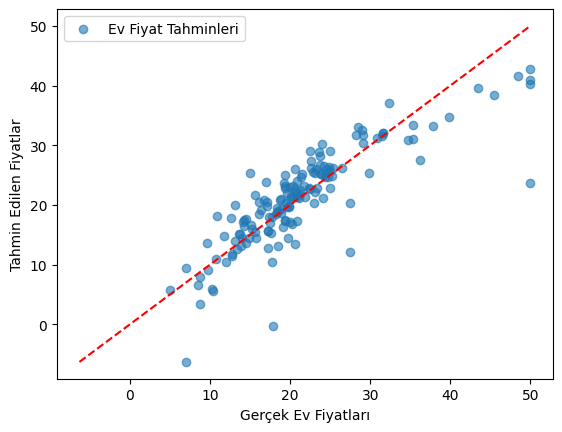

In [75]:
plt.scatter(y_test, y_pred, label="Ev Fiyat Tahminleri", alpha=0.6)
plt.xlabel("Gerçek Ev Fiyatları")
plt.ylabel("Tahmin Edilen Fiyatlar")


min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val],[min_val,max_val], color="red", linestyle="--")

plt.legend()
plt.show()

In [77]:
X_test.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.51,6.416,68.518519,2.6463,5,296,16.6,395.5,9.04


In [94]:
new_house = {
    "CRIM": 6,
    "ZN": 0.0,
    "INDUS":11.083992,
    "CHAS":0.0,
    "NOX":1.51,
    "RM": 6.417,
    "AGE":90.5,
    "DIS":2.64,
    "RAD": 5,
    "TAX": 296,
    "PTRATIO": 16.6,
    "B": 395.5,
    "LSTAT": 9.04
}
new_house_df = pd.DataFrame( [new_house] )
new_house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,6,0.0,11.083992,0.0,1.51,6.417,90.5,2.64,5,296,16.6,395.5,9.04


In [95]:
model.predict(new_house_df)

array([13.66157702])

In [91]:
coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Katsayı"])
coef_df

# CRIM -0.12 -> Her 1 birim crim artışı fiyatı 0.12 birim düşürür. Ters orantı
# ZN +0.03 -> Her 1 birim ZN artışı fiyatı 0.03 birim artırır. Düz orantı

,Katsayı
CRIM,-0.128803
ZN,0.031913
INDUS,-0.010805
CHAS,3.689188
NOX,-13.963873
RM,4.418486
AGE,-0.026106
DIS,-1.432754
RAD,0.196898
TAX,-0.007219
